<a href="https://colab.research.google.com/github/KelvinLam05/Exploratory-and-Statistical-Analysis-with-Marketing-Data/blob/main/Marketing_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Goal of the project**

The aim of this project will be to perform exploratory and statistical analysis with marketing data.

**Data set information**

The data set consists of 2,240 customers of XYZ company with data on:

* Customer profiles

* Product preferences

* Campaign successes/failures

* Channel performance

**Attribute information**

* ID : Customer's Unique Identifier

* Year_Birth : Customer's Birth Year

* Education : Customer's education level

* Marital_Status : Customer's marital status

* Income : Customer's yearly household income

* Kidhome : Number of children in customer's household

* Teenhome : Number of teenagers in customer's household

* Dt_Customer : Date of customer's enrollment with the company

* Recency : Number of days since customer's last purchase

* MntWines : Amount spent on wine in the last 2 years

* MntFruits : Amount spent on fruits in the last 2 years

* MntMeatProducts : Amount spent on meat in the last 2 years

* MntFishProducts : Amount spent on fish in the last 2 years

* MntSweetProducts : Amount spent on sweets in the last 2 years

* MntGoldProds : Amount spent on gold in the last 2 years

* NumDealsPurchases : Number of purchases made with a discount

* NumWebPurchases : Number of purchases made through the company's web site

* NumCatalogPurchases : Number of purchases made using a catalogue

* NumStorePurchases : Number of purchases made directly in stores

* NumWebVisitsMonth : Number of visits to company's web site in the last month

* AcceptedCmp1 : 1 if customer accepted the offer in the 1st campaign, 0 otherwise 

* AcceptedCmp2 : 1 if customer accepted the offer in the 2nd campaign, 0 otherwise 

* AcceptedCmp3 : 1 if customer accepted the offer in the 3rd campaign, 0 otherwise 

* AcceptedCmp4 : 1 if customer accepted the offer in the 4th campaign, 0 otherwise 

* AcceptedCmp5 : 1 if customer accepted the offer in the 5th campaign, 0 otherwise 

* Response : 1 if customer accepted the offer in the last campaign, 0 otherwise 

* Complain : 1 if customer complained in the last 2 years, 0 otherwise

* Country : Customer's location

In [20]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [21]:
# Load dataset
df = pd.read_csv('/content/marketing_data.csv')

In [29]:
# Examine the data
df.head().T

,0,1,2,3,4
ID,1826,1,10476,1386,5371
Year_Birth,1970,1961,1958,1967,1989
Education,Graduation,Graduation,Graduation,Graduation,Graduation
Marital_Status,Divorced,Single,Married,Together,Single
Income,84835,57091,67267,32474,21474
Kidhome,0,0,0,1,1
Teenhome,0,0,1,1,0
Dt_Customer,6/16/14,6/15/14,5/13/14,5/11/14,4/8/14
Recency,0,0,0,0,0
MntWines,189,464,134,10,6


In [23]:
# Overview of all variables, their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

**Preprocessing**

In [24]:
# Clean up column names that contain whitespace
df.columns = df.columns.str.replace(' ', '')

In [25]:
# Displays duplicate records
df.duplicated().sum()

0

In [26]:
# Transform Income column to a numerical
df['Income'] = df['Income'].str.replace(',', '')
df['Income'] = df['Income'].str.replace('$', '').astype('float')

If we run df.describe( ) we will see that the values vary quite significantly in size. This can mislead some models, so it’s wise to scale the data so they all lie within a set range.

In [31]:
# Overview of all variables, their mean and variance
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Generally if the distribution of data is skewed to the left, the mean is less than the median, which is often less than the mode. If the distribution of data is skewed to the right, the mode is often less than the median, which is less than the mean.

Most incomes are distributed between $0 - \$100,000. Average income is 52247 dollars while median income is 51300 dollars. The distribution is right skewed with the possible presence of outliers.

In [28]:
# Checking for missing values
df.isnull().sum().sort_values(ascending = False)

Income                 24
Country                 0
Complain                0
Year_Birth              0
Education               0
Marital_Status          0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
ID                      0
dtype: int64

The feature Income contains 24 null values.

In [ ]:
import missingno as msno

[]

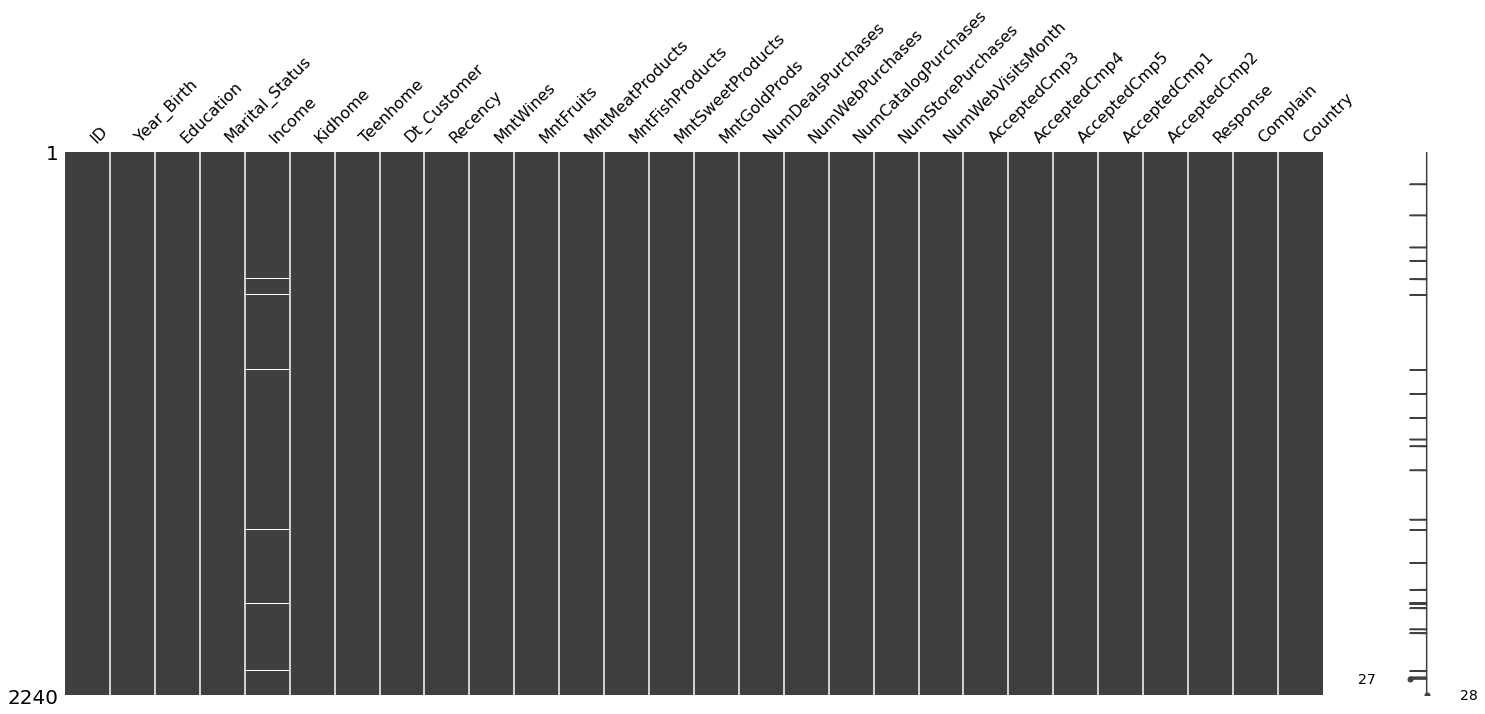

In [ ]:
# Visualize missing values (NaN)
msno.matrix(df).plot(figsize = (12, 8)) 

This matrix shows how nulls are scattered across the dataset. White segments or lines represent where missing values lie.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


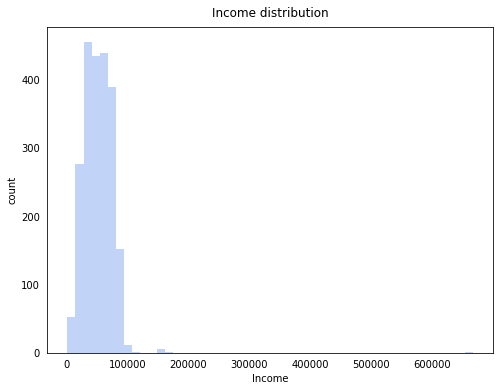

In [ ]:
# Plot this feature to identify best strategy for imputation
plt.figure(figsize = (8, 6))
sns.distplot(df['Income'], kde = False, hist = True, color = 'cornflowerblue')        
plt.tick_params(left = False, bottom = False)
plt.title('Income distribution', size = 12, pad = 10)
plt.ylabel('count');

In [ ]:
# Impute null values in Income, using median value (to avoid skewing of the mean due to outliers)
df['Income'] = df['Income'].fillna(df['Income'].median())

In [ ]:
df.isnull().sum().sort_values(ascending = False)

Country                0
Complain               0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
ID                     0
dtype: int64

In [ ]:
import datetime 

In [ ]:
# Extract Age of Customers, if current year = 2021
year = datetime.date.today().year
df['Age'] = year - df['Year_Birth']

In [ ]:
# Drop the column Year_Birth
df.drop('Year_Birth', axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

In [ ]:
# Select columns to plot
df_to_plot = df.drop(columns = ['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'Country'])

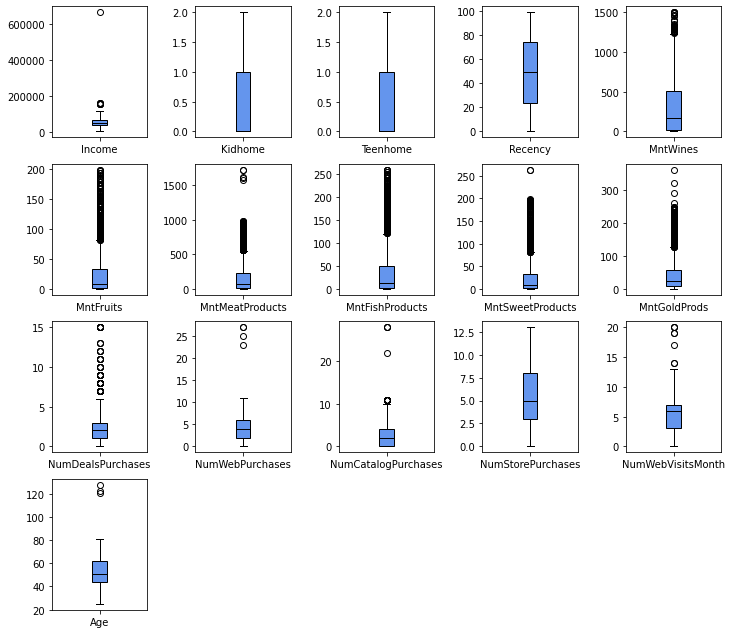

In [ ]:
# Identifying outliers 
df_to_plot.plot(subplots = True, layout = (5,5), kind = 'box', figsize = (12,14), patch_artist = True, boxprops = dict(facecolor = 'cornflowerblue'),
            capprops = dict(color = 'black'),
            whiskerprops = dict(color = 'black'),
            flierprops = dict(markeredgecolor = 'black'),
            medianprops = dict(color= 'black')
            )
plt.tick_params(left = False, bottom = False)
plt.subplots_adjust(wspace = 0.5);

* The outliers at Age column looks suspicious as there are people who       live over 125 years old
* There are data points with especially high income

In [ ]:
df[(df['Income'] > 200000) | (df['Age'] > 100)]

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age
513,11004,2n Cycle,Single,60182.0,0,1,5/17/14,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0,SA,128
527,9432,Graduation,Together,666666.0,1,0,6/2/13,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0,SA,44
827,1150,PhD,Together,83532.0,0,0,9/26/13,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0,SP,122
2233,7829,2n Cycle,Divorced,36640.0,1,0,9/26/13,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,0,1,IND,121


In [ ]:
# Get names of indexes for which column Age has value > 100
index_names = df[ df['Age'] > 100].index

In [ ]:
# Drop these row indexes from dataframe
df.drop(index_names, inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


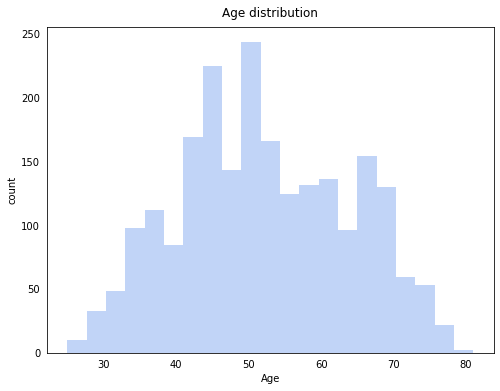

In [ ]:
# Plot 
plt.figure(figsize = (8, 6))
sns.distplot(df['Age'], kde = False, hist = True, color = 'cornflowerblue')        
plt.tick_params(left = False, bottom = False)
plt.title('Age distribution', size = 12, pad = 10)
plt.ylabel('count');

In [ ]:
# Get names of indexes for which column Income has value > 200000
index_names = df[df['Income'] > 200000].index

In [ ]:
# Drop these row indexes from dataFrame
df.drop(index_names, inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


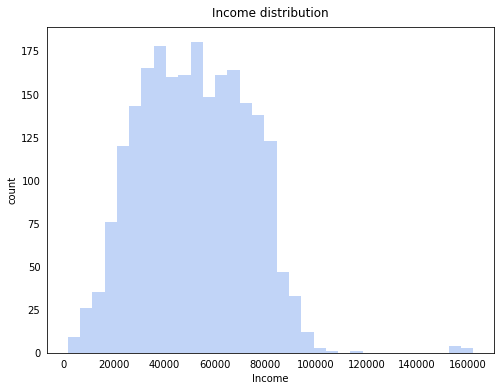

In [ ]:
# Plot 
plt.figure(figsize = (8, 6))
sns.distplot(df['Income'], kde = False, hist = True, color = 'cornflowerblue')        
plt.tick_params(left = False, bottom = False)
plt.title('Income distribution', size = 12, pad = 10)
plt.ylabel('count');

In [ ]:
# Check the values in the Marital_Status category
df.Marital_Status.value_counts()

Married     864
Together    578
Single      479
Divorced    231
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

We can see that the martial_status has outliers (Alone, Absurd, Yolo) as there are only seven records. Therefore, we will simply exclude these outliers from our data.

In [ ]:
# Exclude outliers 
df = df[~df['Marital_Status'].isin(['Absurd', 'Alone', 'YOLO'])]

In [ ]:
df.Marital_Status.value_counts()

Married     864
Together    578
Single      479
Divorced    231
Widow        77
Name: Marital_Status, dtype: int64

In [ ]:
# Check the values in the Education category
df.Education.value_counts()

Graduation    1124
PhD            482
Master         368
2n Cycle       201
Basic           54
Name: Education, dtype: int64

The idea is that customers with basic education are one who completed primary & secondary school, but did not apply to get bachelor degree. While "Graduating" refers to students who are studying for a bachelor's degree (other words "Undergraduate").

In [ ]:
# Converting the feature 'Education' to a category datatype
df['Education'] = df['Education'].astype('category') 

In [ ]:
# Rename category
df['Education'] = df['Education'].cat.rename_categories({'2n Cycle': 'Bachelor', 'Graduation': 'Undergraduate'})

In [ ]:
# Check the names in the categorie
df.Education.value_counts()

Undergraduate    1124
PhD               482
Master            368
Bachelor          201
Basic              54
Name: Education, dtype: int64

In [ ]:
# Check the values in the Country category
df.Country.value_counts()

SP     1094
SA      335
CA      263
AUS     159
IND     146
GER     120
US      109
ME        3
Name: Country, dtype: int64

**Feature engineering**

In [ ]:
# Dependents
df['Dependents'] = df['Kidhome'] + df['Teenhome']

# Year becoming a Customer
df['Year_Customer'] = pd.DatetimeIndex(df['Dt_Customer']).year

# Total Amount Spent
mnt_cols = [col for col in df.columns if 'Mnt' in col]
df['TotalMnt'] = df[mnt_cols].sum(axis = 1)

# Total Purchases
purchases_cols = [col for col in df.columns if 'Purchases' in col]
df['TotalPurchases'] = df[purchases_cols].sum(axis = 1)

# Total Campaigns Accepted
campaigns_cols = [col for col in df.columns if 'Cmp' in col] + ['Response'] 

# Response is for the latest campaign
df['TotalCampaignsAcc'] = df[campaigns_cols].sum(axis = 1)

# View new features, by ID
df[['ID', 'Dependents', 'Year_Customer', 'TotalMnt', 'TotalPurchases', 'TotalCampaignsAcc']].head()

,ID,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,1826,0,2014,1190,15,1
1,1,0,2014,577,18,2
2,10476,1,2014,251,11,0
3,1386,2,2014,11,4,0
4,5371,1,2014,91,8,2


In [ ]:
# Drop uninformative features
df.drop(columns = ['ID', 'Dt_Customer'], inplace = True)

* ID is unique to each customer
* Dt_Customer will be dropped in favor of using engineered variable Year_Customer


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Education            2229 non-null   category
 1   Marital_Status       2229 non-null   object  
 2   Income               2229 non-null   float64 
 3   Kidhome              2229 non-null   int64   
 4   Teenhome             2229 non-null   int64   
 5   Recency              2229 non-null   int64   
 6   MntWines             2229 non-null   int64   
 7   MntFruits            2229 non-null   int64   
 8   MntMeatProducts      2229 non-null   int64   
 9   MntFishProducts      2229 non-null   int64   
 10  MntSweetProducts     2229 non-null   int64   
 11  MntGoldProds         2229 non-null   int64   
 12  NumDealsPurchases    2229 non-null   int64   
 13  NumWebPurchases      2229 non-null   int64   
 14  NumCatalogPurchases  2229 non-null   int64   
 15  NumStorePurchases    

In [ ]:
import copy

In [ ]:
# Make a deep copy of the dataframe
df_copy = copy.deepcopy(df)

**What factors are significantly related to the number of store purchases?**

The table below demonstrates how to interpret the size (strength) of a correlation coefficient.

Size of Correlation         | Interpretation
----------------------------|------------------------------------------
.90 to 1.00 (-.90 to -1.00) | Very high positive (negative) correlation 
.70 to 0.90 (-.70 to -0.90) | High positive (negative) correlation
.50 to 0.70 (-.50 to -0.70) | Moderate positive (negative) correlation
.30 to 0.50 (-.30 to -0.50) | Low positive (negative) correlation
.00 to 0.30 (-.00 to -0.30) | Negligible correlation 

We will use the corr( ) function to examine the Pearson correlation coefficients between the numeric columns and the target parameter NumStorePurchases.

In [ ]:
df.corr()[['NumStorePurchases']].style.background_gradient(sns.light_palette('#2ecc71', as_cmap = True))

,NumStorePurchases
Income,0.627997
Kidhome,-0.500087
Teenhome,0.050612
Recency,0.000281
MntWines,0.642135
MntFruits,0.463219
MntMeatProducts,0.480109
MntFishProducts,0.461358
MntSweetProducts,0.448645
MntGoldProds,0.383997


The categorical features need to be converted to numeric values before they can be used within a model.

In [ ]:
education = pd.get_dummies(df['Education'], prefix = 'Education')
df = pd.concat([df, education], axis = 1)
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc,Education_Bachelor,Education_Basic,Education_Undergraduate,Education_Master,Education_PhD
0,Undergraduate,Divorced,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,51,0,2014,1190,15,1,0,0,1,0,0
1,Undergraduate,Single,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,60,0,2014,577,18,2,0,0,1,0,0
2,Undergraduate,Married,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,63,1,2014,251,11,0,0,0,1,0,0
3,Undergraduate,Together,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,54,2,2014,11,4,0,0,0,1,0,0
4,Undergraduate,Single,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,32,1,2014,91,8,2,0,0,1,0,0


In [ ]:
marital_status = pd.get_dummies(df['Marital_Status'], prefix = 'Marital_Status')
df = pd.concat([df, marital_status], axis = 1)
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc,Education_Bachelor,Education_Basic,Education_Undergraduate,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,Undergraduate,Divorced,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,51,0,2014,1190,15,1,0,0,1,0,0,1,0,0,0,0
1,Undergraduate,Single,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,60,0,2014,577,18,2,0,0,1,0,0,0,0,1,0,0
2,Undergraduate,Married,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,63,1,2014,251,11,0,0,0,1,0,0,0,1,0,0,0
3,Undergraduate,Together,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,54,2,2014,11,4,0,0,0,1,0,0,0,0,0,1,0
4,Undergraduate,Single,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,32,1,2014,91,8,2,0,0,1,0,0,0,0,1,0,0


In [ ]:
country = pd.get_dummies(df['Country'], prefix = 'Country')
df = pd.concat([df, country], axis = 1)
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc,Education_Bachelor,Education_Basic,Education_Undergraduate,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,Undergraduate,Divorced,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,51,0,2014,1190,15,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,Undergraduate,Single,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,60,0,2014,577,18,2,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,Undergraduate,Married,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,63,1,2014,251,11,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,Undergraduate,Together,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,54,2,2014,11,4,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
4,Undergraduate,Single,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,32,1,2014,91,8,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Drop original features
df.drop(columns = ['Education', 'Marital_Status', 'Country'], inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2229 non-null   float64
 1   Kidhome                  2229 non-null   int64  
 2   Teenhome                 2229 non-null   int64  
 3   Recency                  2229 non-null   int64  
 4   MntWines                 2229 non-null   int64  
 5   MntFruits                2229 non-null   int64  
 6   MntMeatProducts          2229 non-null   int64  
 7   MntFishProducts          2229 non-null   int64  
 8   MntSweetProducts         2229 non-null   int64  
 9   MntGoldProds             2229 non-null   int64  
 10  NumDealsPurchases        2229 non-null   int64  
 11  NumWebPurchases          2229 non-null   int64  
 12  NumCatalogPurchases      2229 non-null   int64  
 13  NumStorePurchases        2229 non-null   int64  
 14  NumWebVisitsMonth       

After one hot encoding, we have replaced 2 categorical variables with 18 numerical variables:


From Education, we derived:

 * Education_Basic 
 * Education_Undergraduate
 * Education_Bachelor 
 * Education_Master
 * Education_PhD


From Marital_Status, we derived:


* Marital_Status_Single
* Marital_Status_Together
* Marital_Status_Married
* Marital_Status_Divorced
* Marital_Status_Widow 


From Country, we derived:

* Country_AUS              
* Country_CA               
* Country_GER              
* Country_IND             
* Country_ME               
* Country_SA               
* Country_SP               
* Country_US  

**Examine collinearity**

Let us plot heatplot diagrams to see the correlation of the numeric variables on the store purchases.

Including features that are highly correlated with each other, or are multicollinear, adds noise and inaccuracy, so we need to try and reduce this.

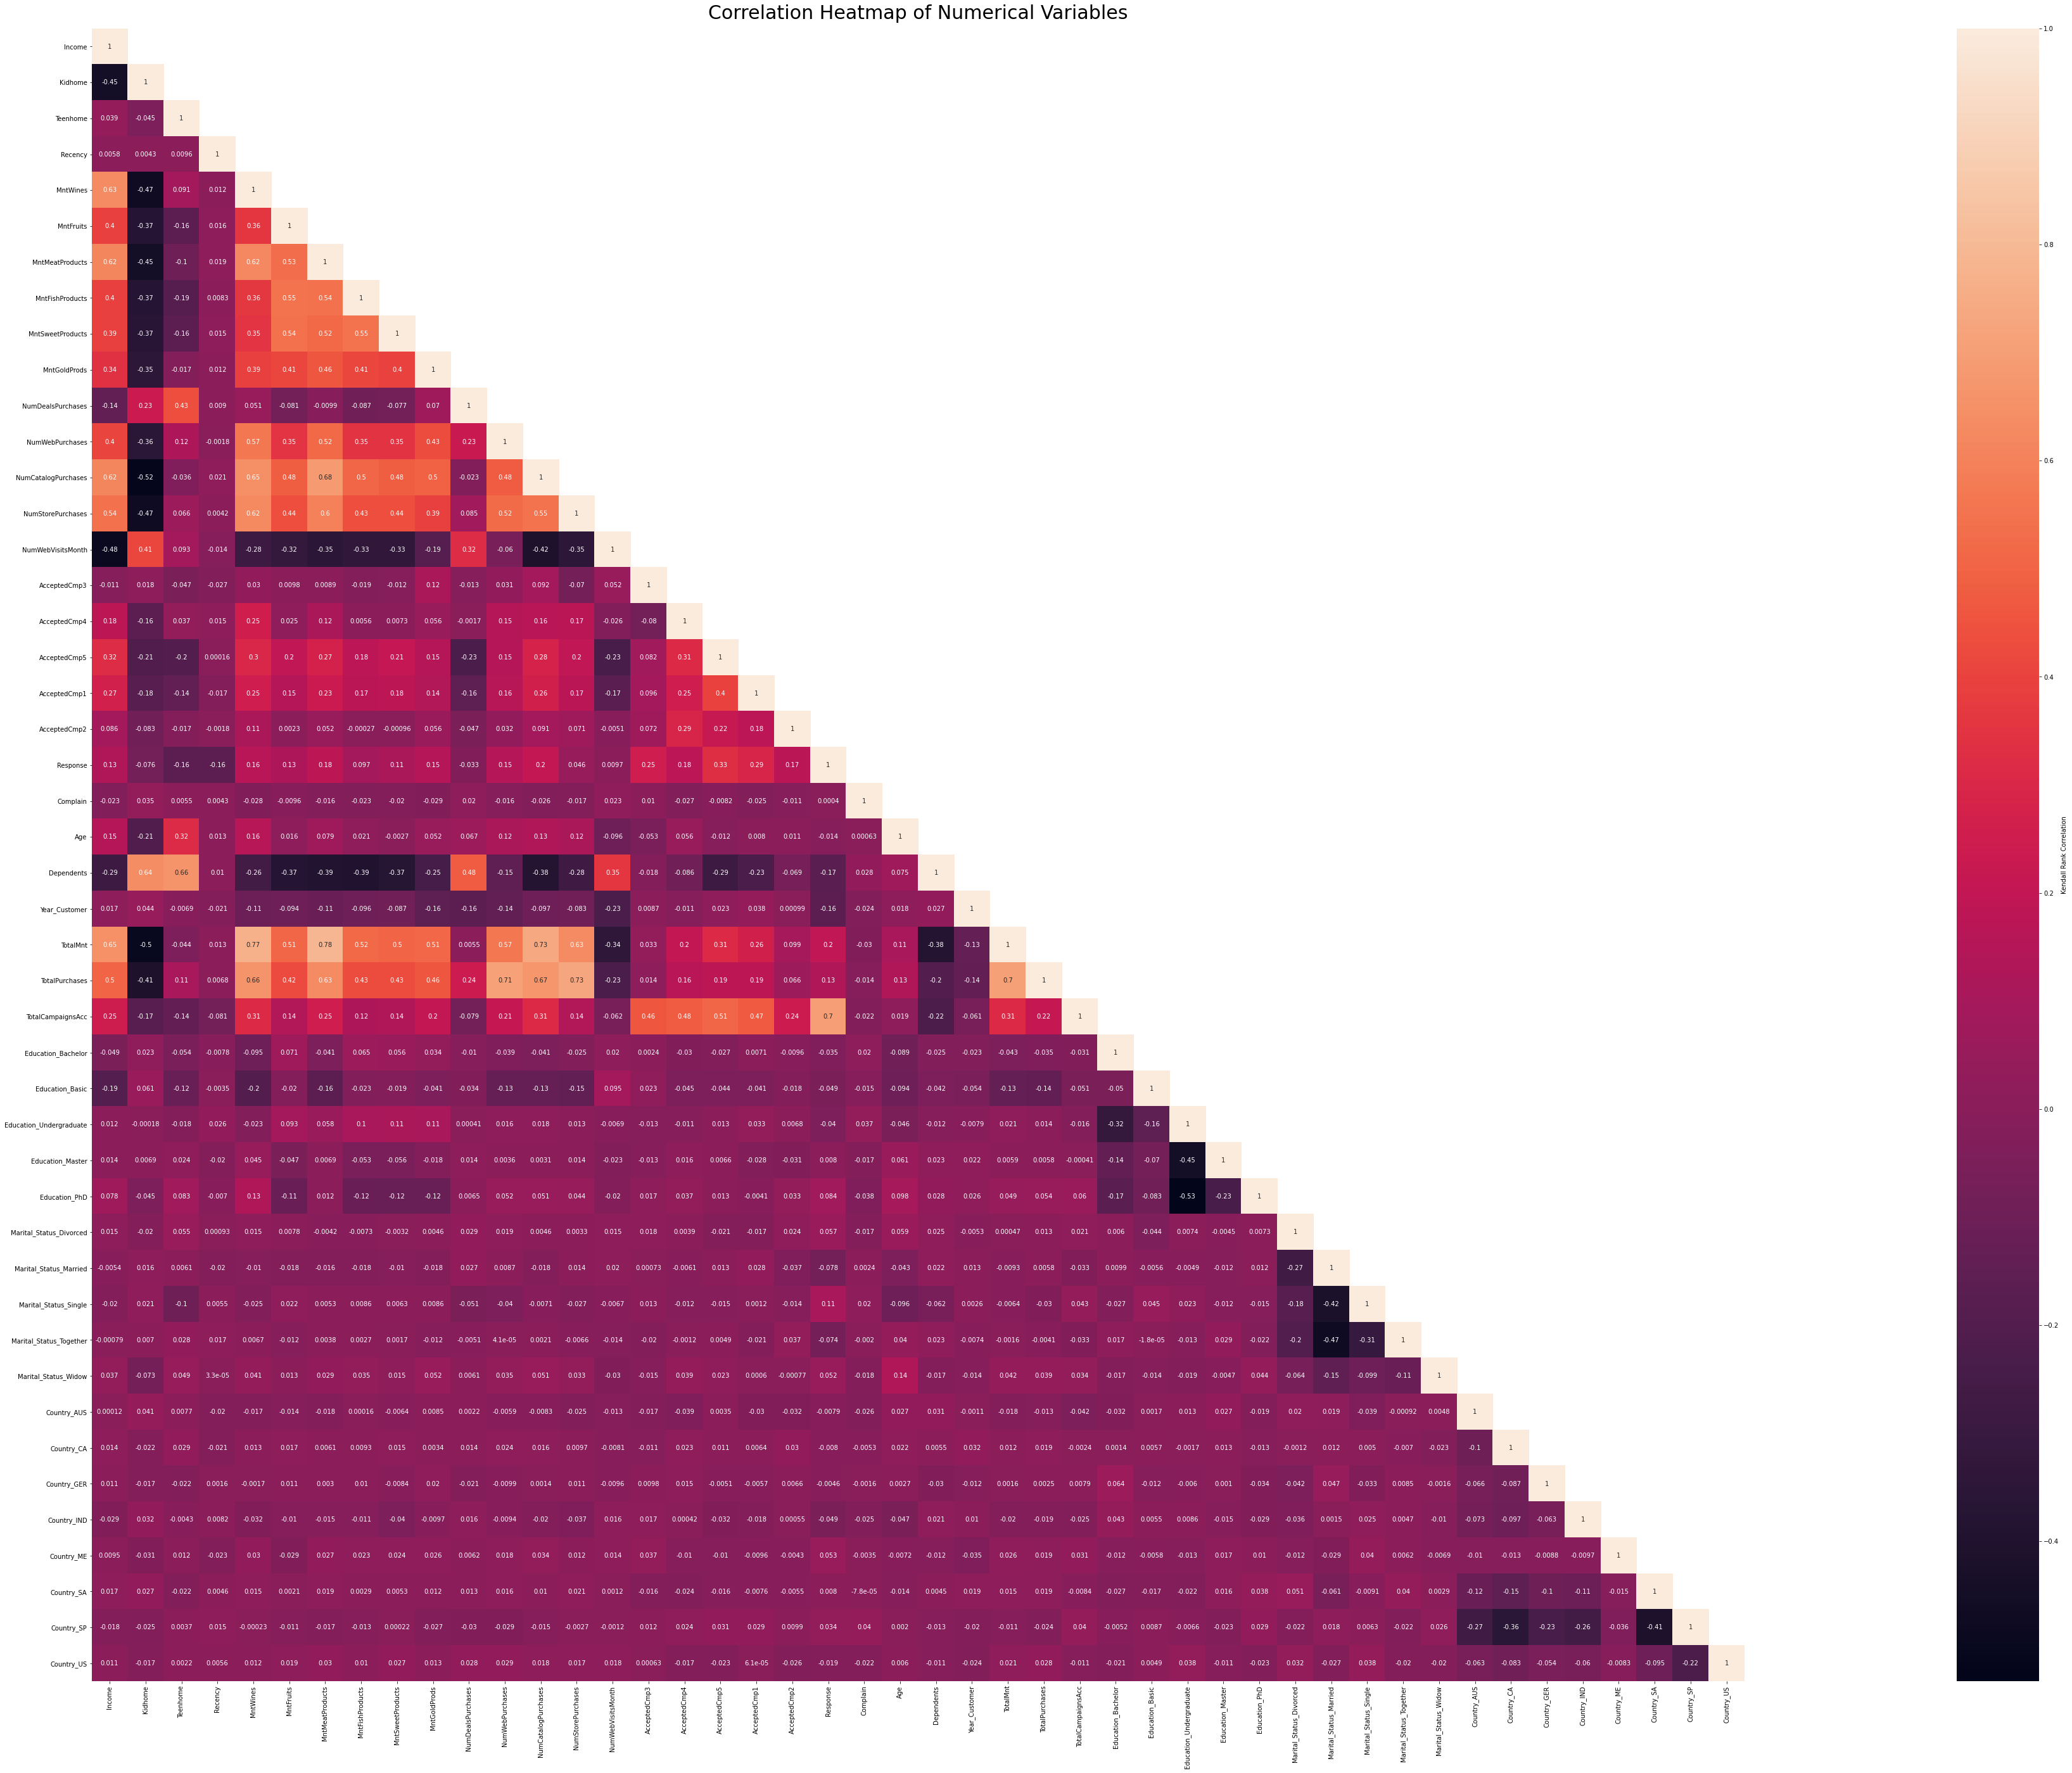

In [ ]:
# Using a non-parametric test of correlation (kendall), since some features are binary
cor_mat = df.corr(method = 'kendall')
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(120, 48)
heatmap = sns.heatmap(data = cor_mat, mask = mask,square = True, annot = True, cbar = True, cbar_kws = {'label': 'Kendall Rank Correlation'})
heatmap.set_title('Correlation Heatmap of Numerical Variables', fontdict = {'fontsize': 30}, pad = 15);

Let's look for variables which have a correlation of < -0.8 or > 0.8 but not 1.0.

In [ ]:
# Select columns to plot
df_num = df.select_dtypes(include = ['float64', 'int64', 'uint8'])

# Drop dependent variable
df_num.drop(['NumStorePurchases'], axis = 1, inplace = True)

# Set threshold value
thresh = 0.8

# Get correlation matrix
df_corr = df_num.corr().abs().unstack()

# Filter
df_corr_filt = df_corr[(df_corr > thresh) & (df_corr != 1) | (df_corr < -thresh) & (df_corr != -1)].reset_index()

# Reanming the DataFrame columns
df_corr_filt.rename(columns = {'level_0': 'Var1','level_1': 'Var2', 0: 'value'}, inplace = True)

# Deduplicate
df_corr_filt.iloc[df_corr_filt[['Var1', 'Var2']].apply(lambda r: ''.join(map(str, sorted(r))), axis = 1).drop_duplicates().index]

,Var1,Var2,value
0,MntWines,TotalMnt,0.892045
1,MntMeatProducts,TotalMnt,0.842861


A general rule to follow to identify severe collinearity is:

If correlation is < -0.8 or > 0.8 between two variables or if a variable's Variance inflation factor (VIF) is greater than 20.

So these pairs of independent variables shouldn't be used together in any of our models because they have a correlation of < -0.8 or > 0.8 and can therefore cause multicollinearity.


When we did the regression for NumStorePurchases, we summed up all the purchases including NumStorePurchases into an engineered feature named TotalPurchases. Even though we dropped NumStorePurchases from the independent variable, it would still be there as part of TotalPurchases. We should drop the summed independent variable TotalPurchases.

In [ ]:
# Drop the feactures TotalMnt and TotalPurchases
df.drop(['TotalMnt', 'TotalPurchases'], axis = 1, inplace = True)

**What factors are strongly related to the number of store purchases?**

Let's have a regression model predict the number of store purchases and from that we can find out the important features that have positive/negative effect on them.

**Split the train and test data**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
X = df.drop(['NumStorePurchases'], axis = 1)

In [ ]:
y = df['NumStorePurchases']

In [ ]:
# Isolate X and y variables, and perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
X_train.shape, y_train.shape

((1560, 43), (1560,))

In [ ]:
X_test.shape, y_test.shape

((669, 43), (669,))

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
# Apply RobustScaler to our train and test sets
scaler = RobustScaler(quantile_range = (25, 75))
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [ ]:
# Create the final Linear Regression
lr_final = LinearRegression()

In [ ]:
# Train the model using 70% of the original data
lr_final.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Generate predictions**

In [ ]:
# Make predictions
y_pred_train = lr_final.predict(X_train)
y_pred_test = lr_final.predict(X_test)

The linear regression achieves an R-squared value of 0.59 on the test set. 

In [ ]:
# Print r-squared score
print('R-Square(train set):', r2_score(y_train, y_pred_train))
print('R-Square(test set):', r2_score(y_test, y_pred_test))

R-Square(train set): 0.5891422549173355
R-Square(test set): 0.5851219945735047


**SHAP Feature Importance**

In [ ]:
import shap

The idea behind SHAP feature importance is simple: Features with large absolute Shapley values are important. Since we want the global importance, we sum the absolute Shapley values per feature across the data.

Next, we sort the features by decreasing importance and plot them. The following figure shows the SHAP feature importance for the linear regression trained before for predicting the number of store purchases.

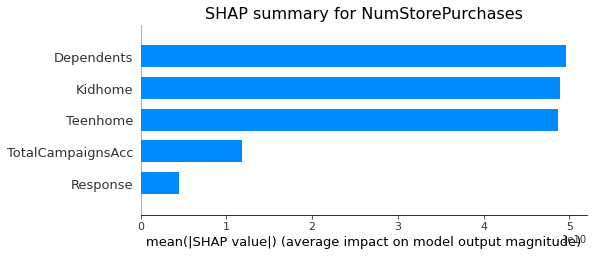

In [ ]:
# Calculate shap values 
ex = shap.Explainer(lr_final, X_train)
shap_values = ex(X_test)

# Plot
plt.title('SHAP summary for NumStorePurchases', size = 16)
shap.summary_plot(shap_values, max_display = 5, plot_type = 'bar');

Identify features that strongly affect the number of store purchases, using  SHAP summary:

* Important features:
  * Dependents, Kidhome and Teenhome 

**Does US fare significantly better than the Rest of the World in terms of total purchases?**

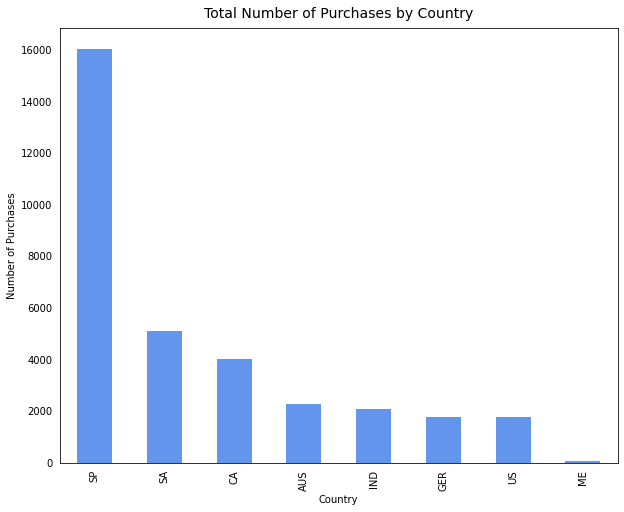

In [ ]:
# Plot
plt.figure(figsize = (10, 8))
df_copy.groupby('Country')['TotalPurchases'].sum().sort_values(ascending = False).plot(kind = 'bar', color = 'cornflowerblue')
plt.tick_params(left = False, bottom = False)
plt.title('Total Number of Purchases by Country', size = 14, pad = 10)
plt.ylabel('Number of Purchases')
plt.show();

Spain (SP) has the highest number of purchases. US is second to last, therefore the US does not fare better than the rest of the world in terms of the total number of purchases.

**Your colleague insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test.**

MntGoldProds_average is True if the MntGoldProds is above average. It's equel to False otherwise.

In [ ]:
# Convert MntGoldProds to a categorical variable
df_copy['MntGoldProds_average'] = \
    df_copy['MntGoldProds'] >  df_copy['MntGoldProds'].mean()

In [ ]:
# Check the values in the MntGoldProds_average category
df_copy.MntGoldProds_average.value_counts()

False    1528
True      701
Name: MntGoldProds_average, dtype: int64

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


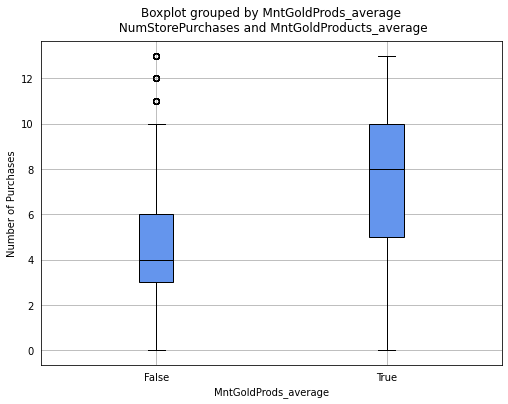

In [ ]:
# Plot 
df_copy.boxplot(column = ['NumStorePurchases'], by = 'MntGoldProds_average', figsize = (8, 6), patch_artist = True, 
boxprops = dict(facecolor = 'cornflowerblue'),
            capprops = dict(color = 'black'),
            whiskerprops = dict(color = 'black'),
            flierprops = dict(markeredgecolor = 'black'),
            medianprops = dict(color = 'black'))

plt.tick_params(left = False, bottom = False)
plt.title(' NumStorePurchases and MntGoldProducts_average', size = 12, pad = 10)
plt.ylabel('Number of Purchases');

In [ ]:
# Overview of the variables 'NumStorePurchases' and 'MntGoldProducts_average'
df_copy.groupby('MntGoldProds_average')['NumStorePurchases'].describe().T

MntGoldProds_average,False,True
count,1528.000000,701.000000
mean,4.893979,7.766049
std,2.945569,3.021738
min,0.000000,0.000000
25%,3.000000,5.000000
50%,4.000000,8.000000
75%,6.000000,10.000000
max,13.000000,13.000000


Those who spend above average on Gold products have higher number of store purchases than those who spend below average.

In [ ]:
# Create two groups
sample_01_True = df_copy[(df_copy['MntGoldProds_average'] == True)]
sample_02_False = df_copy[(df_copy['MntGoldProds_average'] == False)]

In [ ]:
sample_01_True.MntGoldProds_average.head()

0     True
6     True
12    True
14    True
24    True
Name: MntGoldProds_average, dtype: bool

In [ ]:
sample_02_False.MntGoldProds_average.head()

1    False
2    False
3    False
4    False
5    False
Name: MntGoldProds_average, dtype: bool

In [ ]:
# Checking for equel sample sizes
sample_01_True.shape, sample_02_False.shape

((701, 32), (1528, 32))

In [ ]:
# Make the group sizes equal
sample_02_False = sample_02_False.sample(701)

In [ ]:
sample_01_True.shape, sample_02_False.shape

((701, 32), (701, 32))

In [ ]:
from scipy import stats
from sklearn.preprocessing import scale

In [ ]:
# Run Levene's test
stats.levene(sample_01_True['NumStorePurchases'], sample_02_False['NumStorePurchases'])

LeveneResult(statistic=13.241067600096809, pvalue=0.00028383880140841523)

The p-value associated with Levene's test is LESS THAN .05. The variance of the dependent variable is not equal over all subpopulations.

In [ ]:
diff = scale(np.array(sample_01_True['NumStorePurchases']) - np.array(sample_02_False['NumStorePurchases']))

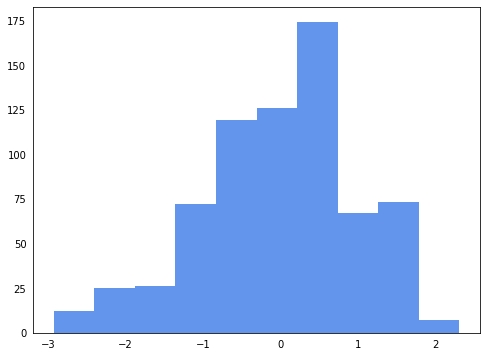

In [ ]:
# Visualizing normality
plt.figure(figsize = (8, 6))
plt.hist(diff, color = 'cornflowerblue')
plt.tick_params(left = False, bottom = False)

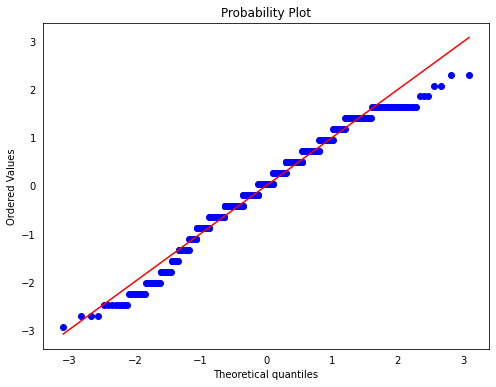

In [ ]:
# Visualizing normality
plt.figure(figsize = (8, 6))
plt.tick_params(left = False, bottom = False)
stats.probplot (diff, plot = plt)
plt.show()

In [ ]:
# Testing for normality
stats.shapiro(diff)

ShapiroResult(statistic=0.9781681895256042, pvalue=1.0102144898382903e-08)

The p-value is below 0.05, the target variable NumStorePurchases significantly deviate from a normal distribution.

Next, perform the Mann-Whitney U (non-parametric test) since NumStorePurchases is not normally distributed. The test also doesn't assume equal variances.

**Using Mann-Whitney U test for difference of the means between two samples**

We need to separate the scores for each category. We can create a list with booleans (true/false) for each category.

In [ ]:
# Create a list with booleans (true/false) for each category
above_average = df_copy['MntGoldProds_average'] = \
    df_copy['MntGoldProds'] >  df_copy['MntGoldProds'].mean()
below_average = df_copy['MntGoldProds_average'] = \
    df_copy['MntGoldProds'] <  df_copy['MntGoldProds'].mean()  

In [ ]:
numstorepurchases = df_copy['NumStorePurchases'] 

These we can use to select the scores of each category and store them separately.

In [ ]:
# Select the scores of each category and store them separately
above_avg = numstorepurchases[above_average].dropna()
below_avg = numstorepurchases[below_average].dropna()

In [ ]:
# Convert the scores of each category to a list
list_above_avg = list(above_avg)
list_below_avg = list(below_avg)

In [ ]:
import PyNonpar
from PyNonpar.twosample import wilcoxon_mann_whitney_test

In [ ]:
# Perform Mann-Whitney U test
PyNonpar.twosample.wilcoxon_mann_whitney_test(list_above_avg, list_below_avg, method = 'asymptotic', alpha = 0.05)

WilcoxonMannWhitneyResult(alternative='two.sided', statistic=-20.628298781207594, HodgesLehmann=-3.0, lowerCI=-3, upperCI=-3, pvalue=1.5293638207252005e-94)

Since the p-value is less than 0.05, this shows that there are sufficient evidence to reject the null hypothesis.

Therefore, those who spend above average on Gold products have higher number of store purchases than those who spend below average.

In [ ]:
# Drop MntGoldProds_average 
df_copy.drop(columns = 'MntGoldProds_average', axis = 1, inplace = True)

**Fish has Omega 3 fatty acids which are good for the brain. Accordingly, does Education have a significant relation with the variable MntFishProducts?**

In [ ]:
# Converting the feature Education to a category datatype
df_copy['Education'] = df_copy['Education'].astype('category') 

In [ ]:
# Rename category
df_copy['Education'] = df_copy['Education'].cat.rename_categories({'2n Cycle': 'Bachelor', 'Graduation': 'Undergraduate'})

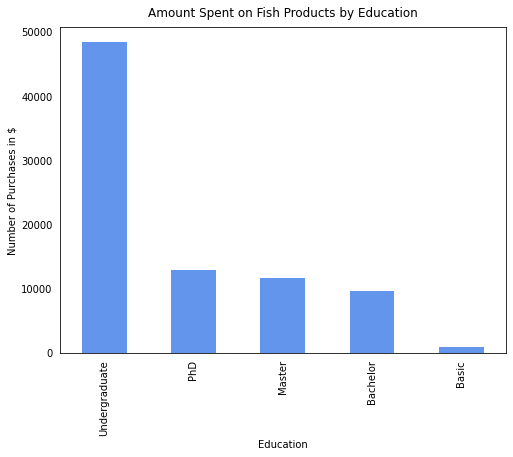

In [ ]:
# Plot
plt.figure(figsize = (8, 6))
df_copy.groupby('Education')['MntFishProducts'].sum().sort_values(ascending = False).plot(kind = 'bar', color = 'cornflowerblue')
plt.tick_params(left = False, bottom = False)
plt.title('Amount Spent on Fish Products by Education', size = 12, pad = 10)
plt.ylabel('Number of Purchases in $');

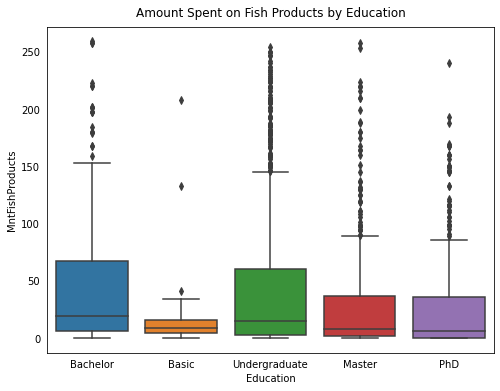

In [ ]:
# Plot
plt.figure(figsize = (8, 6))
plt.tick_params(left = False, bottom = False)
plt.title('Amount Spent on Fish Products by Education', size = 12, pad = 10)
sns.boxplot(x = 'Education', y = 'MntFishProducts', data = df_copy);

In [ ]:
# Run Levene's test
stats.levene(df_copy['MntFishProducts'][df_copy['Education'] == 'Basic'],
df_copy['MntFishProducts'][df_copy['Education'] == 'Bachelor'],
df_copy['MntFishProducts'][df_copy['Education'] == 'Undergraduate'],
df_copy['MntFishProducts'][df_copy["Education"] == 'Master'],
df_copy['MntFishProducts'][df_copy["Education"] == 'PhD'])

LeveneResult(statistic=10.452041191474205, pvalue=2.1805148410607076e-08)

The p-value associated with Levene's test is LESS THAN .05. The variance of the dependent variable is not equal over all subpopulations.

In [ ]:
from scipy import stats
import researchpy as rp
from statsmodels.formula.api import ols

In [ ]:
model = ols('MntFishProducts ~ Education', data = df_copy).fit()

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


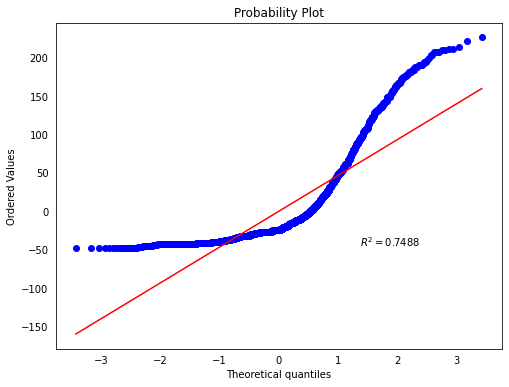

In [ ]:
# Visualizing normality
plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111)
normality_plot, stat = stats.probplot(model.resid, plot = plt, rvalue= True)
plt.tick_params(left = False, bottom = False)
ax.set_title("Probability plot of model residual's", fontsize = 14, pad = 10)
ax.set
plt.show()

In [ ]:
# Testing for normality
stats.shapiro(model.resid)

ShapiroResult(statistic=0.7485512495040894, pvalue=0.0)

The p-value is below 0.05, the 'MntFishProducts' significantly deviate from a normal distribution.

Next, perform the Kruskal-Wallis H (non-parametric test) since 'MntFishProducts' is not normally distributed. The  Kruskal-Wallis also doesn't require equal variances.

**Using Kruskal-Wallis H test for difference of the means between all samples**

In [ ]:
from pingouin import kruskal

In [ ]:
# Perform Kruskal-Wallis H test
results = kruskal(dv = 'MntFishProducts', between = 'Education', data = df_copy)

In [ ]:
results

,Source,ddof1,H,p-unc
Kruskal,Education,4,72.122596,8.085331e-15


Since p-value < 0.05, there is sufficient evidence to prove that the different levels of education have a significant relation with the target variable 'MntFishProducts'.

**Is there a significant relationship between Married PhD candidates and  MntFishProducts?**

In [ ]:
# Sum the marital status and PhD dummy variables - the Married + PhD group will have value of 2
df['Married_PhD'] = df['Marital_Status_Married'] + df['Education_PhD']
df['Married_PhD'] = df['Married_PhD'].replace({2: 'Married-PhD', 1: 'Other', 0: 'Other'})

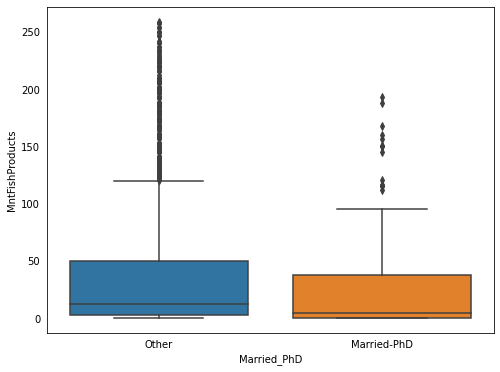

In [ ]:
# Plot 
plt.figure(figsize = (8, 6))
plt.tick_params(left = False, bottom = False)
sns.boxplot(x = 'Married_PhD', y = 'MntFishProducts', data = df);

In [ ]:
# Overview of the variables Married_PhD and MntFishProducts
df.groupby('Married_PhD')['MntFishProducts'].describe().T

Married_PhD,Married-PhD,Other
count,192.000000,2037.000000
mean,27.015625,38.439863
std,41.997940,55.419945
min,0.000000,0.000000
25%,0.000000,3.000000
50%,4.000000,12.000000
75%,38.000000,50.000000
max,193.000000,259.000000


Married PhD candidates spend less money on fish products than others.

In [ ]:
# Create two groups
sample_01_Mar = df[(df['Married_PhD'] == 'Married-PhD')]
sample_02_Oth = df[(df['Married_PhD'] == 'Other')]

In [ ]:
# Checking for equel sample sizes
sample_01_Mar.shape, sample_02_Oth.shape

((192, 45), (2037, 45))

In [ ]:
# Make the group sizes equal
sample_02_Oth = sample_02_Oth.sample(192)

In [ ]:
sample_01_Mar.shape, sample_02_Oth.shape

((192, 45), (192, 45))

In [ ]:
# Run Levene's test
stats.levene(sample_01_Mar['MntFishProducts'], sample_02_Oth['MntFishProducts'])

LeveneResult(statistic=2.8426707307563315, pvalue=0.09260806349993389)

The p-value associated with Levene's test is GREATER THAN .05. The variance of the dependent variable is equal over all subpopulations.

In [ ]:
from sklearn.preprocessing import scale

In [ ]:
diff = scale(np.array(sample_01_Mar['MntFishProducts']) - np.array(sample_02_Oth['MntFishProducts']))

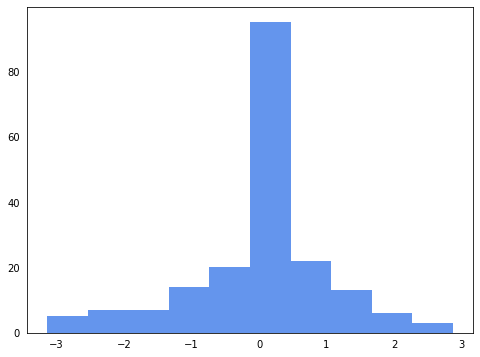

In [ ]:
# Visualizing normality
plt.figure(figsize = (8, 6))
plt.hist(diff, color = 'cornflowerblue')
plt.tick_params(left = False, bottom = False)

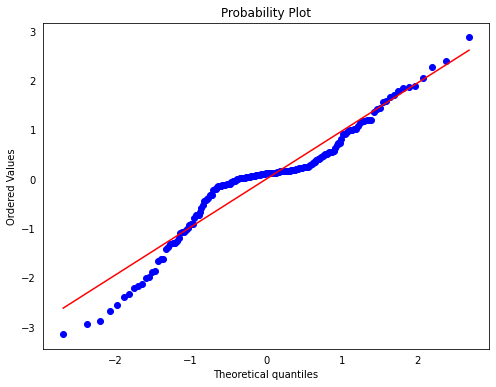

In [ ]:
# Visualizing normality
plt.figure(figsize = (8, 6))
stats.probplot (diff, plot = plt)
plt.tick_params(left = False, bottom = False)
plt.show()

In [ ]:
# Testing for normality
stats.shapiro(diff)

ShapiroResult(statistic=0.9273431301116943, pvalue=3.5130291564655636e-08)

The p-value is below 0.05, the MntFishProducts significantly deviate from a normal distribution.

Next, perform the one-way ANOVA (parametric test) since 'MntFishProducts' is not normally distributed. The one-way ANOVA is considered a robust test against the normality assumption.

**Using one-way ANOVA test for difference of the means between two samples**

In [ ]:
import scipy.stats as stats

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2229 non-null   float64
 1   Kidhome                  2229 non-null   int64  
 2   Teenhome                 2229 non-null   int64  
 3   Recency                  2229 non-null   int64  
 4   MntWines                 2229 non-null   int64  
 5   MntFruits                2229 non-null   int64  
 6   MntMeatProducts          2229 non-null   int64  
 7   MntFishProducts          2229 non-null   int64  
 8   MntSweetProducts         2229 non-null   int64  
 9   MntGoldProds             2229 non-null   int64  
 10  NumDealsPurchases        2229 non-null   int64  
 11  NumWebPurchases          2229 non-null   int64  
 12  NumCatalogPurchases      2229 non-null   int64  
 13  NumStorePurchases        2229 non-null   int64  
 14  NumWebVisitsMonth       

In [ ]:
# Perform one-way ANOVA test
stats.f_oneway(df['MntFishProducts'][df['Married_PhD'] == 'Married-PhD'], df['MntFishProducts'][df['Married_PhD'] == 'Other'])

F_onewayResult(statistic=7.738525283570559, pvalue=0.005451032575636701)

Married PhD candidates spend significantly less money on fish products compared to others.

In [ ]:
# Drop Married_PhD
df.drop(columns = 'Married_PhD', inplace = True)

**Which marketing campaign is most successful?**

In [ ]:
# Calculate success rate (percent accepted)
cam_success = pd.DataFrame(df_copy[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean() * 100, 
                           columns = ['Percent']).reset_index()

In [ ]:
cam_success

,index,Percent
0,AcceptedCmp1,6.415433
1,AcceptedCmp2,1.345895
2,AcceptedCmp3,7.267833
3,AcceptedCmp4,7.492149
4,AcceptedCmp5,7.222970
5,Response,14.849708


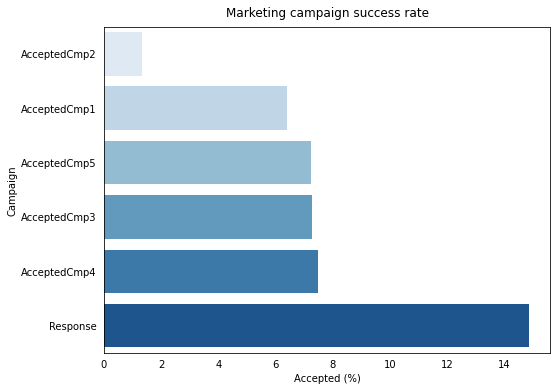

In [ ]:
# Plot 
plt.figure(figsize = (8, 6))
sns.barplot(x = 'Percent', y = 'index', data= cam_success.sort_values('Percent'), palette = 'Blues')
plt.tick_params(left = False, bottom = False)
plt.xlabel('Accepted (%)')
plt.ylabel('Campaign')
plt.title('Marketing campaign success rate', pad = 10, size = 12);

    Most successful campaign:

* The most successful campaign is the most recent (column name: Response)

In [ ]:
# List of columns with binary responses
binary_cols = [col for col in df_copy.columns if 'Accepted' in col] + ['Response', 'Complain']

# List of columns for spending 
mnt_cols = [col for col in df_copy.columns if 'Mnt' in col]

# List of columns for channels
channel_cols = [col for col in df_copy.columns if 'Num' in col] + ['TotalPurchases', 'TotalCampaignsAcc']


**What does the average customer look like for this company?**

In [ ]:
# Demographics
demographics = pd.DataFrame(round(df_copy.drop(columns = binary_cols + mnt_cols + channel_cols).mean(), 1), columns = ['Average']).reindex([
'Income', 'Kidhome', 'Teenhome', 'Recency', 'Age', 'Dependents', 'Year_Customer'])

In [ ]:
demographics

,Average
Income,51948.4
Kidhome,0.4
Teenhome,0.5
Recency,49.2
Age,52.1
Dependents,1.0
Year_Customer,2013.0


    The average customer is...

* Age 52
* Became a customer in 2013
* Has an income of roughly $52,000 per year
* Has 1 dependent (roughly equally split between kids or teens)
* Made a purchase from our company in the last 49 days

**Which products are performing best?**

In [ ]:
# Spending
spending = pd.DataFrame(round(df_copy[mnt_cols].mean(), 1), columns = ['Average']).sort_values(by = 'Average').reset_index()

In [ ]:
spending

,index,Average
0,MntFruits,26.3
1,MntSweetProducts,27.1
2,MntFishProducts,37.5
3,MntGoldProds,43.9
4,MntMeatProducts,167.1
5,MntWines,304.2
6,TotalMnt,606.1


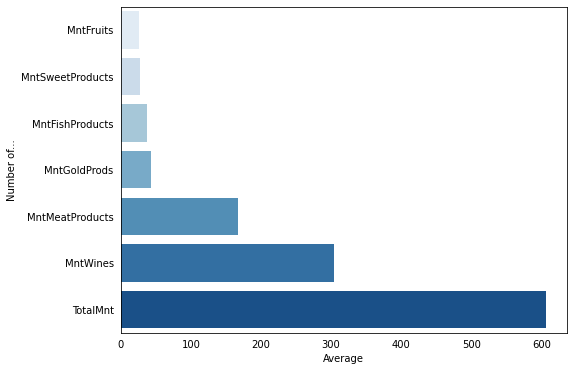

In [ ]:
# Plot 
plt.figure(figsize = (8, 6))
ax = sns.barplot(x = 'Average', y = 'index', data = spending, palette = 'Blues')
plt.ylabel('Number of...')
plt.tick_params(left = False, bottom = False)

    The average customer spent...

* $25-50 on Fruits, Sweets, Fish, or Gold products
* Over 160 dollars on Meat products
* Over 300 dollars on Wines
* Over 600 dollars total

    Products performing best:

* Wines
* Followed by meats

**Which channels are underperforming?**

In [ ]:
# Channels
channels = pd.DataFrame(round(df_copy[channel_cols].mean(), 1), columns = ['Average']).sort_values(by = 'Average').reset_index()

In [ ]:
channels

,index,Average
0,TotalCampaignsAcc,0.4
1,NumDealsPurchases,2.3
2,NumCatalogPurchases,2.7
3,NumWebPurchases,4.1
4,NumWebVisitsMonth,5.3
5,NumStorePurchases,5.8
6,TotalPurchases,14.9


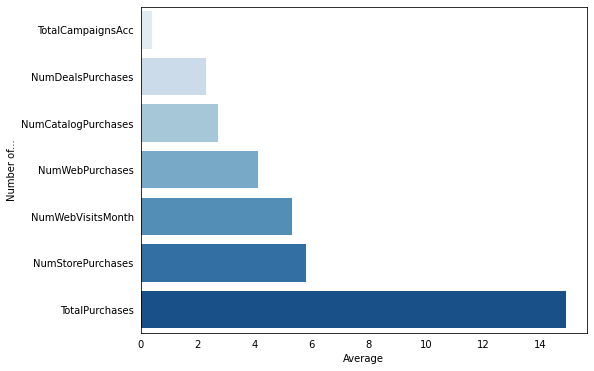

In [ ]:
# Plot 
plt.figure(figsize = (8, 6))
ax = sns.barplot(x = 'Average', y = 'index', data = channels, palette = 'Blues')
plt.ylabel('Number of...')
plt.tick_params(left = False, bottom = False)

    The average customer...

* Accepted less than 1 advertising campaign
* Made 2 deals purchases, 2 catalog purchases, 4 web purchases, and 5 store   purchases
* Averaged 14 total purchases
* Visited the website 5 times

    Underperforming channels:

* Advertising campaigns
* Followed by deals, and catalog